In [259]:
import pandas as pd
import numpy as np
import scipy as sp
%matplotlib inline
import matplotlib.pyplot as plt

In [260]:
df=pd.DataFrame(pd.read_csv('kuiper.csv', sep=';'))

In [261]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.10313,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.03608,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.84786,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.91314,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.17032,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


Данные состоят из 804 наблюдений и следующих 12 наблюдений:

Price – число - цена автомобиля

Mileage – число - пробег (в милях)

Make – номинальная -  Производитель: {'Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'}

Model – номинальная  - модель автомобиля 

Trim – номинальная - тип модели

Type – номинальная - тип автомобиля: {'Convertible', 'Coupe', 'Hatchback', 'Sedan', 'Wagon'}

Cylinder – число - количество цилиндров {4, 6, 8}

Liter – число - объем двигателя

Doors – число -  количество дверей {2,4}

Cruise – бинарная - наличие круиз-контроля ( 1 – есть, 0 – нет)

Sound – бинарная - наличие модернизированной аудиосистемы (1 - есть, 0 – нет)

Leather – бинарная - наличие кожаных сидений (1 - есть,0 – нет)

Задача - предсказать цену автомобиля, исходя из остальных признаков

In [266]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Price,804,NaN,NaN,NaN,21343.1,9884.85,8638.93,14273.1,18025,26717.3,70755.5
Mileage,804,NaN,NaN,NaN,19831.9,8196.32,266,14623.5,20913.5,25213,50387
Make,804,6,Chevrolet,320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,804,32,AVEO,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Trim,804,47,Sedan 4D,170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,804,5,Sedan,490,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cylinder,804,NaN,NaN,NaN,5.26866,1.38753,4,4,6,6,8
Liter,804,NaN,NaN,NaN,3.03731,1.10556,1.6,2.2,2.8,3.8,6
Doors,804,NaN,NaN,NaN,3.52736,0.850169,2,4,4,4,4
Cruise,804,NaN,NaN,NaN,0.752488,0.431836,0,1,1,1,1


Визуализация признаков:

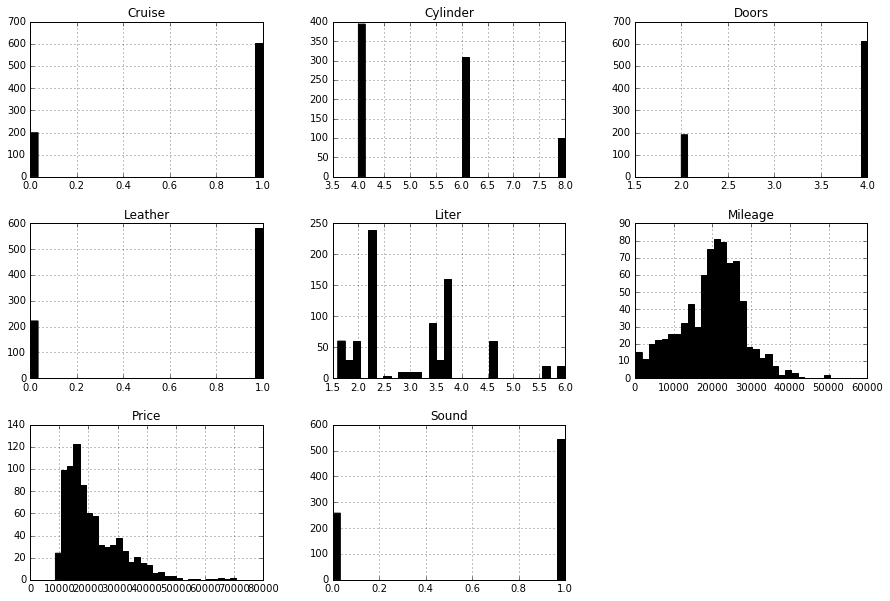

In [267]:
df.hist(color = 'k', bins = 30, figsize=(15,10))
plt.show()

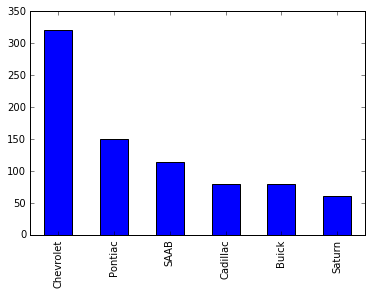

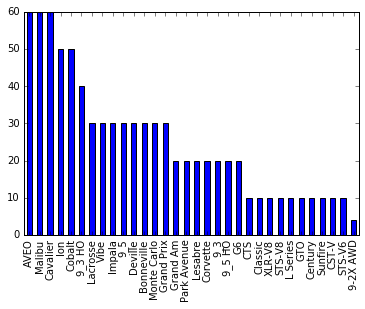

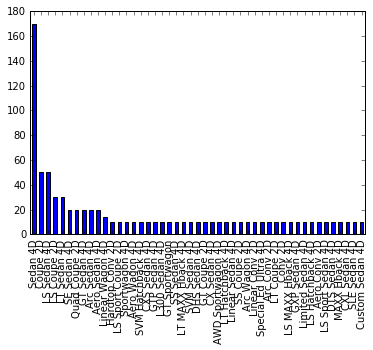

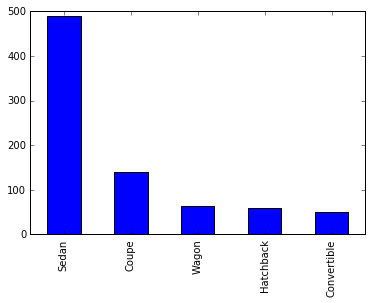

In [73]:
fig1 = plt.figure()
(df['Make'].value_counts().plot(kind='bar'))
fig2 = plt.figure()
df['Model'].value_counts().plot(kind='bar')
fig3 = plt.figure()
df['Trim'].value_counts().plot(kind='bar')
fig4 = plt.figure()
df['Type'].value_counts().plot(kind='bar')

Найдем корреляции признаков и цены:

In [81]:
pd.DataFrame(df.corr()['Price'])

,Price
Price,1.000000
Mileage,-0.143051
Cylinder,0.569086
Liter,0.558146
Doors,-0.138750
Cruise,0.430851
Sound,-0.124348
Leather,0.157197


Визуализация зависимости между небинарными признаками:

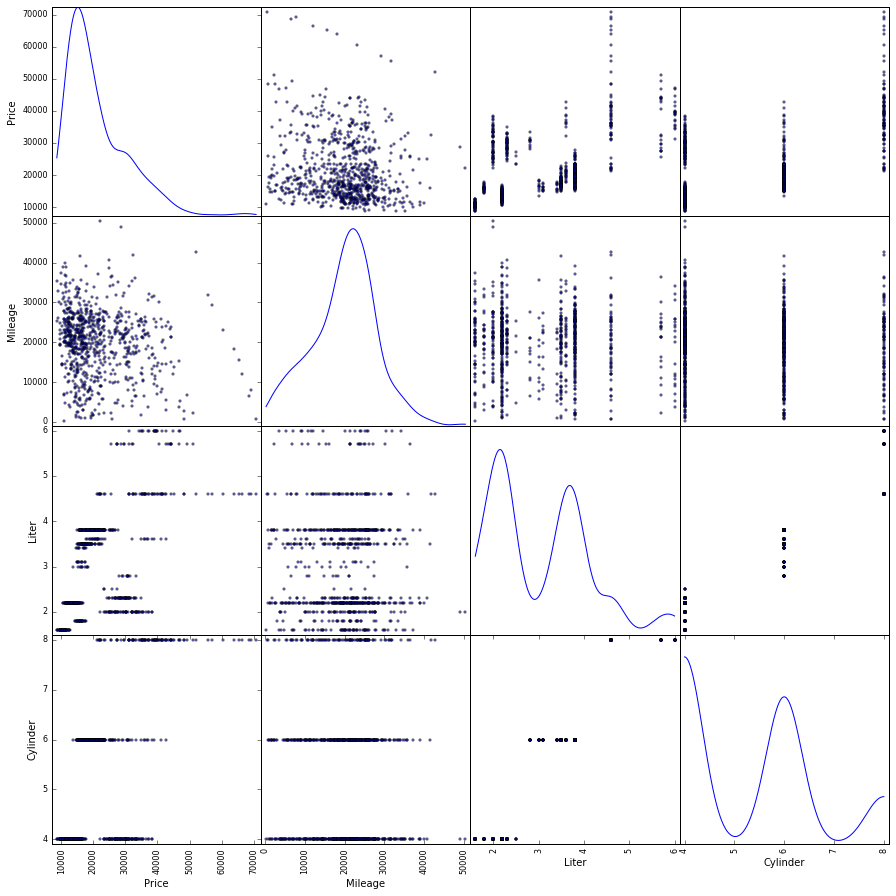

In [298]:

pd.scatter_matrix(df[['Price', 'Mileage', 'Liter', 'Cylinder']], figsize=(15, 15), diagonal='kde')
plt.show()

Добавим dummy-переменные:

In [277]:
df_make = pd.get_dummies(df['Make'])
df_model=pd.get_dummies(df['Model'])
df_trim = pd.get_dummies(df['Trim'])
df_type=pd.get_dummies(df['Type'])
df1= pd.DataFrame(pd.concat([df, df_make,df_model,df_trim,df_type], axis=1))

In [278]:
df1

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,...,SVM Hatchback 4D,SVM Sedan 4D,Sedan 4D,Special Ed Ultra 4D,Sportwagon 4D,Convertible,Coupe,Hatchback,Sedan,Wagon
0,17314.10313,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,1,0,0,0,0,0,1,0
1,17542.03608,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,1,0,0,0,0,0,1,0
2,16218.84786,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,1,0,0,0,0,0,1,0
3,16336.91314,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,1,0,0,0,0,0,1,0
4,16339.17032,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,1,0,0,0,0,0,1,0
5,15709.05282,22236,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,1,0,0,0,0,0,1,0
6,15230.00339,22576,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,1,0,0,0,0,0,1,0
7,15048.04218,22964,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,1,0,0,0,0,0,1,0
8,14862.09387,24021,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,1,0,0,0,0,0,1,0
9,15295.01827,27325,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,1,0,0,0,0,0,1,0


Найдем корреляции всех признаков, включая dummy-переменные. Отсортируем их по убыванию.

In [293]:
cor=abs(pd.DataFrame(df1.corr()['Price']))
cor.sort_values(by='Price',ascending =0)

,Price
Price,1.000000
Cadillac,0.659297
Cylinder,0.569086
Liter,0.558146
Convertible,0.508018
Hardtop Conv 2D,0.472538
XLR-V8,0.472538
Cruise,0.430851
Chevrolet,0.404598
SAAB,0.335404
